In [1]:
!pip install binclass-tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/FintechDS

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/FintechDS


In [9]:
!ls

amazon_reviews.txt


In [10]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [11]:

data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [12]:
data.loc[data["VERIFIED_PURCHASE"] == "Y", "VERIFIED_PURCHASE"] = int(1)
data.loc[data["VERIFIED_PURCHASE"] == "N", "VERIFIED_PURCHASE"] = int(0)

In [13]:
# Create an "All text column"

data["TEXT"] = data["PRODUCT_TITLE"] + data["REVIEW_TITLE"] + data["REVIEW_TEXT"]

In [ ]:
len(data)

21000

In [14]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...","Targus PAUK10U Ultra Mini USB Keypad, Blackuse..."
1,2,1,4,1,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,Note 3 Battery : Stalion Strength Replacement ...
2,3,1,3,0,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,"Fisher-Price Papasan Cradle Swing, Starlightdo..."
3,4,1,4,0,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,Casio MS-80B Standard Function Desktop Calcula...
4,5,1,4,0,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,Shine Whitening - Zero Peroxide Teeth Whitenin...


In [15]:
cnt_srs=data.groupby(data["PRODUCT_CATEGORY"]).count()
cnt_srs

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT
PRODUCT_CATEGORY,,,,,,,,,
Apparel,700,700,700,700,700,700,700,700,700
Automotive,700,700,700,700,700,700,700,700,700
Baby,700,700,700,700,700,700,700,700,700
Beauty,700,700,700,700,700,700,700,700,700
Books,700,700,700,700,700,700,700,700,700
Camera,700,700,700,700,700,700,700,700,700
Electronics,700,700,700,700,700,700,700,700,700
Furniture,700,700,700,700,700,700,700,700,700
Grocery,700,700,700,700,700,700,700,700,700


In [ ]:
cnt_srs=data.groupby(data["LABEL"]).count() #50-50 ratio
cnt_srs

,DOC_ID,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT
LABEL,,,,,,,,,
0,10500,10500,10500,10500,10500,10500,10500,10500,10500
1,10500,10500,10500,10500,10500,10500,10500,10500,10500


In [ ]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

In [ ]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

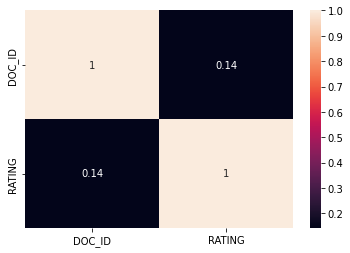

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Get brands (named entity recognition)

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
names = nlp(data['PRODUCT_TITLE'][0])

In [ ]:
print([(X.text, X.label_) for X in names.ents])

[('Ultra Mini USB Keypad', 'PERSON')]


#SENTIMENT ANALYSIS

In [ ]:
from textblob import TextBlob

In [ ]:
from sklearn.model_selection import train_test_split

x = data.loc[:, data.columns != 'LABEL']
y = data.LABEL

x_train, x_val, y_train, y_val = train_test_split( x, y, test_size=0.2,shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5,shuffle=True, random_state=1)


In [ ]:
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity



def get_polarity_label(value):
    pol = value
    if pol > 0:
        result = 'positive'
    elif pol < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

def get_polarity_label_torch(value):
    pol = value
    if pol > 0:
        result = 0
    elif pol < 0:
        result = 1
    else:
        result = 2
    return result

def get_subjectivity_label(value):
    sub = value
    if sub >  0.66:
        result = 'subjective'
    elif sub < 0.33:
        result = 'objective'
    else:
        result = 'neutral'
    return result

    #0.0 is very objective and 1.0 is very subjective.

In [ ]:
# Sentiment Score for Review
def add_sent_analysis_cols(df, sett = 'train', save = True):
    df['sentiment'] = df['TEXT'].apply(get_polarity)
    df['subjectivity'] = df['TEXT'].apply(get_subjectivity)
    df['sentiment_label'] = df['sentiment'].apply(get_polarity_label)
    df['subjectivity_label'] = df['subjectivity'].apply(get_subjectivity_label)
    
    if save:
        df.to_csv(sett +'_withSA.csv') #You can comment this line if necessary
    return df

In [ ]:
x_train= add_sent_analysis_cols(x_train)
x_val = add_sent_analysis_cols(x_val, sett= 'val', save=True)

In [ ]:
x_train = pd.load('train_withSA.csv')
x_val = pd.load('val_withSA')

In [ ]:
x_train.head()

,DOC_ID,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT,sentiment,subjectivity,sentiment_label,subjectivity_label
16106,16107,5,1,Watches,B004VRD5DW,Timex Women's T49856 Expedition Field Burnt Si...,Great watch with nice contrast between the bla...,Great watch with nice contrast between the bla...,Timex Women's T49856 Expedition Field Burnt Si...,0.056771,0.580208,positive,neutral
10729,10730,4,0,Office Products,B001J8HAH8,Lexmark X544N Mfp Color Laser 25/25 Ppm P/s/c/...,Good laser printer with true to life color,We are on our second of these printers. The f...,Lexmark X544N Mfp Color Laser 25/25 Ppm P/s/c/...,0.190515,0.473828,positive,neutral
16660,16661,4,1,PC,B00FILKNBM,Generic USB 2.0 Easycap Dc60 Tv Dvd Vhs Video ...,"easy, I finally found the serial number on the...","Installed, easy, I finally found the serial n...",Generic USB 2.0 Easycap Dc60 Tv Dvd Vhs Video ...,0.207407,0.629630,positive,neutral
16652,16653,5,1,Electronics,B0061RJSWC,BlueRigger High Speed Braided HDMI Cable with ...,BlueRigger HDMI cable,Be prepared to be pleasantly surprised! Aside ...,BlueRigger High Speed Braided HDMI Cable with ...,0.427292,0.648750,positive,neutral
10579,10580,5,1,Pet Products,B000795XMY,K&H Manufacturing Deluxe Kitty Sill With Bolst...,Wonderful perch!,We recently adopted a cat wanted to start with...,K&H Manufacturing Deluxe Kitty Sill With Bolst...,0.289732,0.571219,positive,neutral


# Unimodal strategy

In [16]:
# Create an "All data" string column

data["ALL"] = data["PRODUCT_CATEGORY"]+["SEP"] + data["VERIFIED_PURCHASE"].astype(str) +["SEP"]+ data["RATING"].astype(str)+ ["SEP"] + data["TEXT"]

In [17]:
from sklearn.model_selection import train_test_split

x = data.loc[:, data.columns != 'LABEL']
y = data.LABEL

x_train, x_val, y_train, y_val = train_test_split( x, y, test_size=0.2,shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5,shuffle=True, random_state=1)

# BERT embeddings

In [18]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.8 MB 69.4 MB/s 
     |████████████████████████████████| 1.3 MB 61.8 MB/s 
     |████████████████████████████████| 182 kB 65.5 MB/s 
     |████████████████████████████████| 7.6 MB 57.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9cde47988e45ae31fc154c9e4550fa6cb698206974e3a26d7c0f6f925df48738
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [19]:
import plotly as px
import torch


In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# from sentence_transformers import SentenceTransformer
# bert = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1', device= device)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#sentence_embeddings = bert.encode(x_train['REVIEW_TEXT'].tolist())

# BERT for classification

In [21]:
from transformers import BertTokenizer, AutoModel, BertTokenizerFast,AutoTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
#tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") #try this one next
#other bert classification using https://github.com/prathameshmahankal/Fake-News-Detection-Using-BERT/blob/main/notebooks/train.ipynb


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
x_train.head()

,DOC_ID,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT,ALL
16106,16107,5,1,Watches,B004VRD5DW,Timex Women's T49856 Expedition Field Burnt Si...,Great watch with nice contrast between the bla...,Great watch with nice contrast between the bla...,Timex Women's T49856 Expedition Field Burnt Si...,WatchesSEP1SEP5SEPTimex Women's T49856 Expedit...
10729,10730,4,0,Office Products,B001J8HAH8,Lexmark X544N Mfp Color Laser 25/25 Ppm P/s/c/...,Good laser printer with true to life color,We are on our second of these printers. The f...,Lexmark X544N Mfp Color Laser 25/25 Ppm P/s/c/...,Office ProductsSEP0SEP4SEPLexmark X544N Mfp Co...
16660,16661,4,1,PC,B00FILKNBM,Generic USB 2.0 Easycap Dc60 Tv Dvd Vhs Video ...,"easy, I finally found the serial number on the...","Installed, easy, I finally found the serial n...",Generic USB 2.0 Easycap Dc60 Tv Dvd Vhs Video ...,PCSEP1SEP4SEPGeneric USB 2.0 Easycap Dc60 Tv D...
16652,16653,5,1,Electronics,B0061RJSWC,BlueRigger High Speed Braided HDMI Cable with ...,BlueRigger HDMI cable,Be prepared to be pleasantly surprised! Aside ...,BlueRigger High Speed Braided HDMI Cable with ...,ElectronicsSEP1SEP5SEPBlueRigger High Speed Br...
10579,10580,5,1,Pet Products,B000795XMY,K&H Manufacturing Deluxe Kitty Sill With Bolst...,Wonderful perch!,We recently adopted a cat wanted to start with...,K&H Manufacturing Deluxe Kitty Sill With Bolst...,Pet ProductsSEP1SEP5SEPK&H Manufacturing Delux...


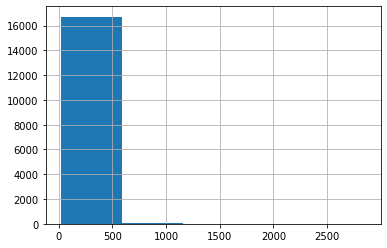

In [ ]:
seq_len = [len(i.split()) for i in x_train.ALL]

pd.Series(seq_len).hist(bins = 5) #512 max

In [24]:
max_seq_len = 512
     
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    #x_train.REVIEW_TEXT.tolist(),
    x_train.ALL.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    #x_val.REVIEW_TEXT.tolist(),
    x_val.ALL.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    #x_test.REVIEW_TEXT.tolist(),
    x_test.ALL.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [25]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(y_train.values.astype(np.float32))

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(y_val.values.astype(np.float32))

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(y_test.values.astype(np.float32))

In [26]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# BERT fine tuning

In [27]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False
     


In [28]:
import torch.nn as nn
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [29]:


# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)
     


In [30]:


# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)
     


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [31]:
y_train

16106    0
10729    0
16660    0
16652    0
10579    0
        ..
10955    0
17289    0
5192     1
12172    0
235      1
Name: LABEL, Length: 16800, dtype: object

In [32]:



from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes =['0', '1'], y= y_train)

print(class_wts)
     


[0.99620493 1.00382409]


In [33]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 5
     

# Training loop

In [34]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.type(torch.LongTensor).to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [35]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.type(torch.LongTensor).to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds
     

In [36]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'unimod_saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    525.
  Batch   100  of    525.
  Batch   150  of    525.
  Batch   200  of    525.
  Batch   250  of    525.
  Batch   300  of    525.
  Batch   350  of    525.
  Batch   400  of    525.
  Batch   450  of    525.
  Batch   500  of    525.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.689
Validation Loss: 0.666

 Epoch 2 / 5
  Batch    50  of    525.
  Batch   100  of    525.
  Batch   150  of    525.
  Batch   200  of    525.
  Batch   250  of    525.
  Batch   300  of    525.
  Batch   350  of    525.
  Batch   400  of    525.
  Batch   450  of    525.
  Batch   500  of    525.

Evaluating...
  Batch    50  of     66.

Training Loss: 0.668
Validation Loss: 0.674

 Epoch 3 / 5
  Batch    50  of    525.
  Batch   100  of    525.
  Batch   150  of    525.
  Batch   200  of    525.
  Batch   250  of    525.
  Batch   300  of    525.
  Batch   350  of    525.
  Batch   400  of    525.
  Batch   450  of    525.
  Batch   500  of    525.

Evalu

In [37]:
import matplotlib.pyplot as plt

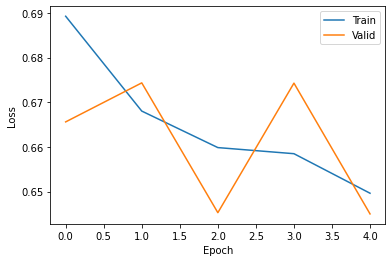

In [38]:


plt.plot(range(len(train_losses)), train_losses, label='Train')
plt.plot(range(len(valid_losses)), valid_losses, label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 
     


In [39]:
from sklearn.metrics import (classification_report, f1_score, recall_score, precision_score, 
                             precision_recall_curve, confusion_matrix, matthews_corrcoef)

# Testing

In [40]:
#model.load_state_dict(torch.load('saved_weights.pt'))
model.load_state_dict(torch.load('unimod_saved_weights.pt'))

<All keys matched successfully>

In [41]:
test_text = x_test.REVIEW_TEXT
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

max_seq_len = 25

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])



In [42]:
with torch.no_grad():
  pred_proba = model(test_seq.to(device), test_mask.to(device))
  pred_proba = pred_proba.detach().cpu().numpy()

preds = np.argmax(pred_proba, axis = 1)

print([preds.tolist(), pred_proba.tolist()])

[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [43]:
y_test = y_test.map({'1': 1, '0': 0}).astype(int)

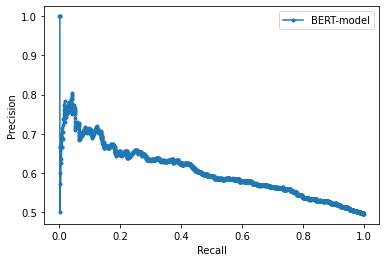


Matthews Corr Coef: 0.17833664733755178
Precision: 0.5689102564102564
Recall: 0.6826923076923077
f-1 score: 0.5829719792062888
              precision    recall  f1-score   support

           0       0.61      0.49      0.55      1060
           1       0.57      0.68      0.62      1040

    accuracy                           0.59      2100
   macro avg       0.59      0.59      0.58      2100
weighted avg       0.59      0.59      0.58      2100



In [44]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

# model's performance
precision_, recall_, proba = precision_recall_curve(y_test, preds[:, -1])
preds = np.argmax(preds, axis = 1)

#plot precision-recall curve
plt.plot(recall_, precision_, marker='.', label='BERT-model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# optimal_proba_cutoff = sorted(list(zip(np.abs(precision_ - recall_), proba)), key=lambda i: i[0], reverse=False)[0][1]
# preds = [1 if i >= optimal_proba_cutoff else 0 for i in preds[:, -1]]

mcc = matthews_corrcoef(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds, average='weighted')

print("")
print("Matthews Corr Coef:", mcc)
print("Precision:", precision)
print("Recall:", recall)
print("f-1 score:", f1)

print(classification_report(y_test, preds))

In [45]:
pred_proba

array([[-0.6779904 , -0.7085373 ],
       [-0.6450331 , -0.74369377],
       [-0.42857718, -1.0539315 ],
       ...,
       [-0.6718444 , -0.71491367],
       [-1.3482361 , -0.30069703],
       [-0.974472  , -0.47383744]], dtype=float32)

In [46]:
import bctools as bc

auROC_test = bc.curve_ROC_plot(true_y= y_test, predicted_proba = pred_proba[:,1], title = "AUROC - Test" )  
auPRC_test = bc.curve_PR_plot(true_y= y_test, predicted_proba = pred_proba[:,1],  beta = 1, title = "AUPRC - Test" )

In [47]:
def show_conf_matrix(target, preds, set1 = "", model="", run=None):
    confmat_DNN = confusion_matrix(target, preds)
    print("CM - " +set1 +  " Set")
    print("-----------")
    print(confmat_DNN)
    plt.figure(figsize=(4,4))
    fig = sns.heatmap(confmat_DNN, annot=True,  linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("CM - " +set1 +  " Set" , size = 15)

    if run:
        run["confusion-matrix"] = fig

CM - Test Set
-----------
[[522 538]
 [330 710]]


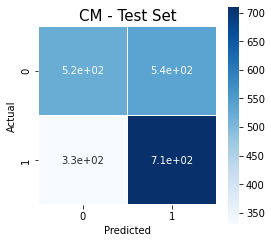

In [48]:
show_conf_matrix(y_test, preds, set1 = "Test", model="", run=None)

In [49]:
!pip install multimodal-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 27.3 MB/s 
     |████████████████████████████████| 880 kB 64.1 MB/s 
     |████████████████████████████████| 3.0 MB 42.8 MB/s 
  Created wheel for multimodal-transformers: filename=multimodal_transformers-0.1.4a0-py3-none-any.whl size=20632 sha256=4b185e380fb218a8a31d043ad2efe3e20a482f5b7b6f15597017719f8c55434a
  Stored in directory: /root/.cache/pip/wheels/cb/81/ce/bb521aecbd6b21f191dca42bf304dac947fc173b6952f73867
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=19e723f8b68c15fa0483eee69a3a189d01639b4917c27f73231f548c28128853
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built multimodal-transformers sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers

In [50]:
from transformers import (
    AutoTokenizer,
    AutoConfig,
    Trainer,
    EvalPrediction,
    set_seed
)
from transformers.training_args import TrainingArguments

from multimodal_transformers.data import load_data_from_folder
from multimodal_transformers.model import TabularConfig
from multimodal_transformers.model import AutoModelWithTabular

logging.basicConfig(level=logging.INFO)
os.environ['COMET_MODE'] = 'DISABLED'


RuntimeError: ignored